Christian Colon

Final

Question 1

(i)

In [1]:
da1 = read.table("q-ko-earns8309.txt", header = TRUE)

In [2]:
da1

pends,anntime,value
19830331,19830426,0.0375
19830630,19830725,0.0492
19830930,19831102,0.0463
19831231,19840214,0.0379
19840331,19840419,0.0425
19840630,19840720,0.0583
19840930,19841020,0.0558
19841231,19850221,0.0417
19850331,19850418,0.0450
19850630,19850719,0.0625


In [4]:
da_ts = ts(da1$value,frequency=4,start=c(1983,1))

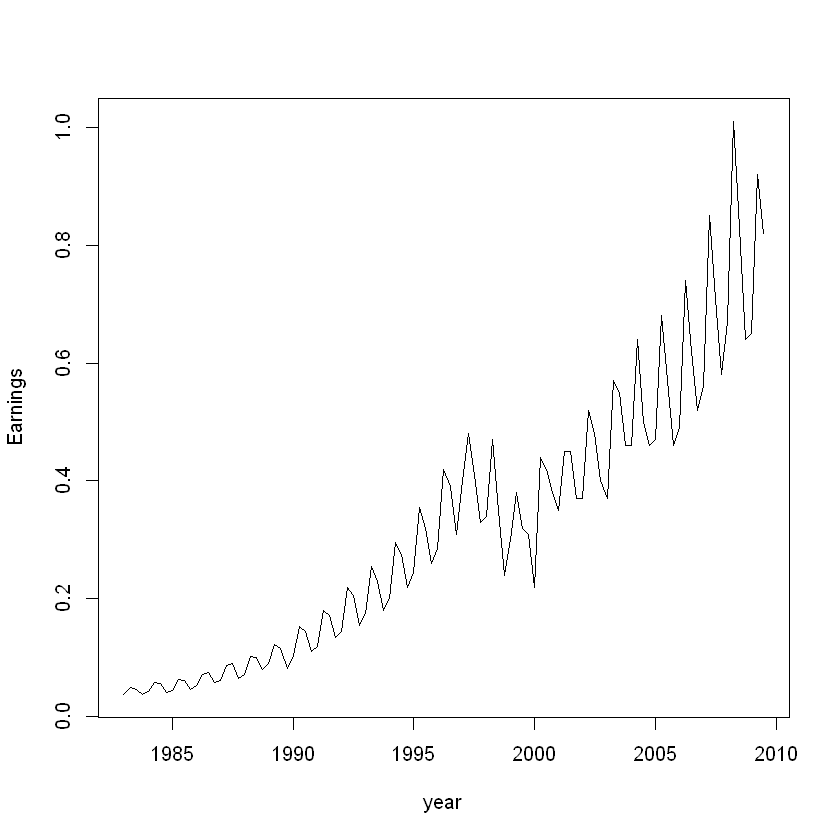

In [11]:
plot(da_ts,type='l',xlab='year',ylab='Earnings')

There is trending in this series and a seasonal pattern.

In [7]:
lg_earn = log(da1$value)

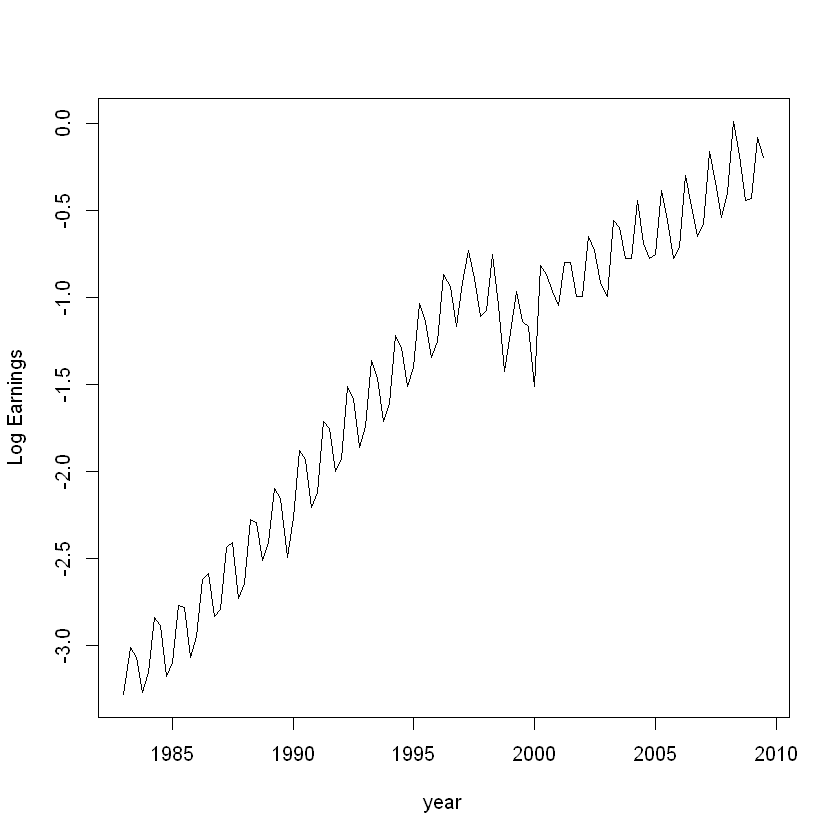

In [10]:
plot(ts(lg_earn,frequency=4,start=c(1983,1)),type='l',xlab='year',ylab='Log Earnings')

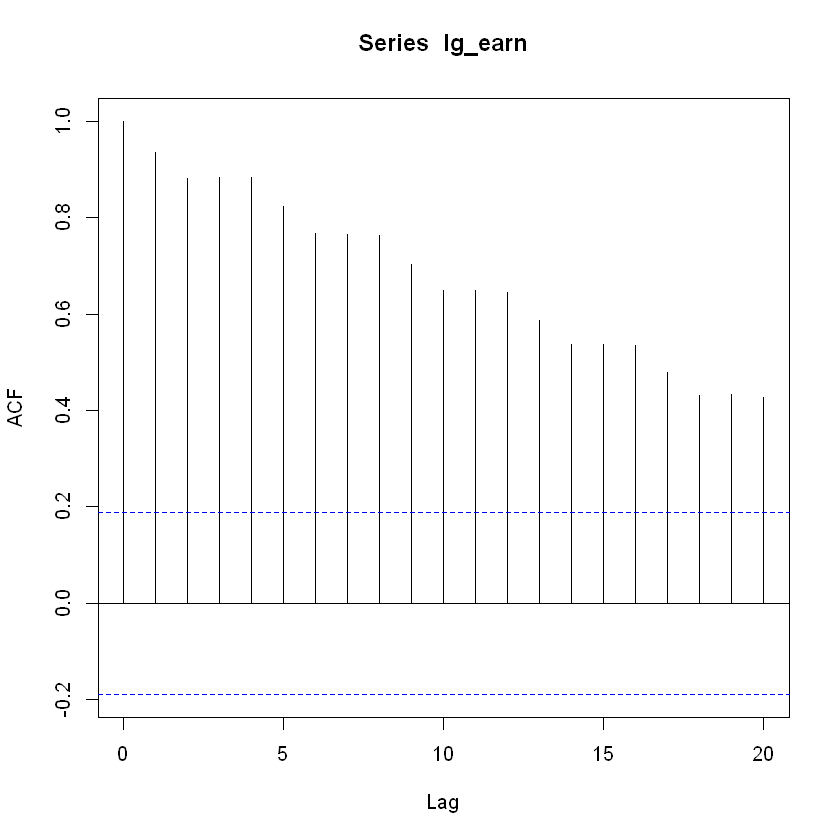

In [15]:
acf(lg_earn)

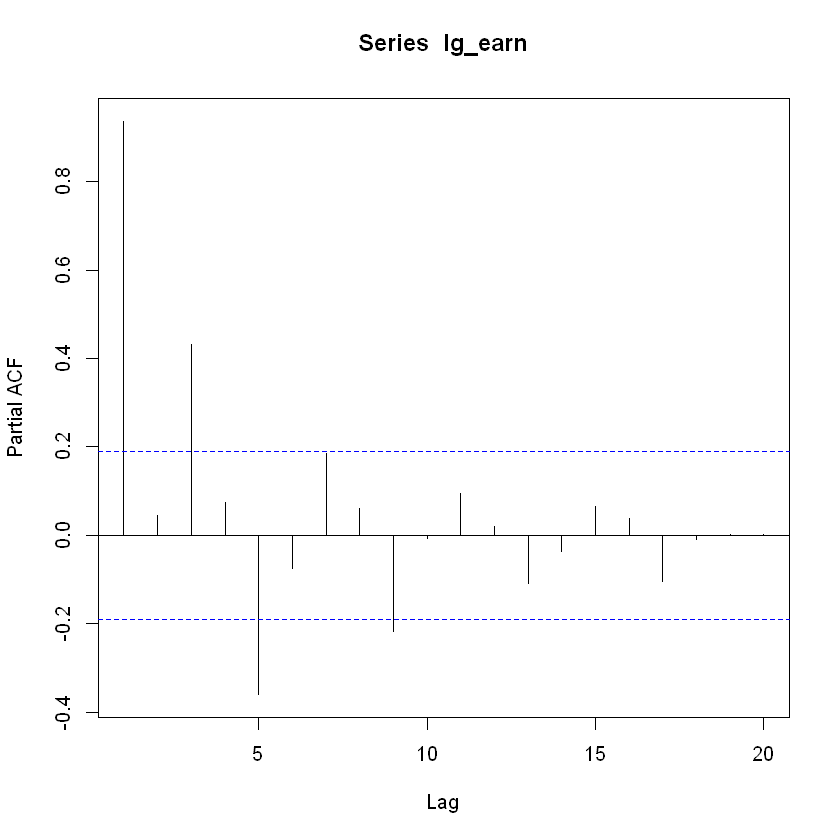

In [16]:
pacf(lg_earn)

Code below will iterate through combinations of ARIMA models and pick model with best AIC

In [35]:
ftfinal.aic = Inf
ftfinal.order = c(0,0,0)
for (p in 1:5) for (d in 0:1) for (q in 1:5) {
    ftcurrent.aic = AIC(arima(lg_earn, order=c(p, d, q)))
    if (ftcurrent.aic < ftfinal.aic) {
        ftfinal.aic = ftcurrent.aic
        ftfinal.order = c(p, d, q)
        ftfinal.arima = arima(lg_earn, order=ftfinal.order)
    }
}

Warning message in arima(lg_earn, order = c(p, d, q)):
"possible convergence problem: optim gave code = 1"Warning message in arima(lg_earn, order = ftfinal.order):
"possible convergence problem: optim gave code = 1"

ERROR: Error in arima(lg_earn, order = c(p, d, q)): non-stationary AR part from CSS


In [36]:
ftfinal.order

[1] 1 1 5

In [34]:
ftfinal.arima


Call:
arima(x = lg_earn, order = ftfinal.order)

Coefficients:
          ar1      ar2      ma1     ma2      ma3     ma4
      -0.0048  -0.9800  -0.3903  0.9829  -0.4274  0.4235
s.e.   0.0195   0.0194   0.1158  0.0829   0.1053  0.1240

sigma^2 estimated as 0.00929:  log likelihood = 94.8,  aic = -175.6

Differencing of one makes sense because there was trending in the series. MA 5 makes sense because there was significance in pacf up to lag 5. AR 1 will take care of persistant decaying serial corellation in acf. 

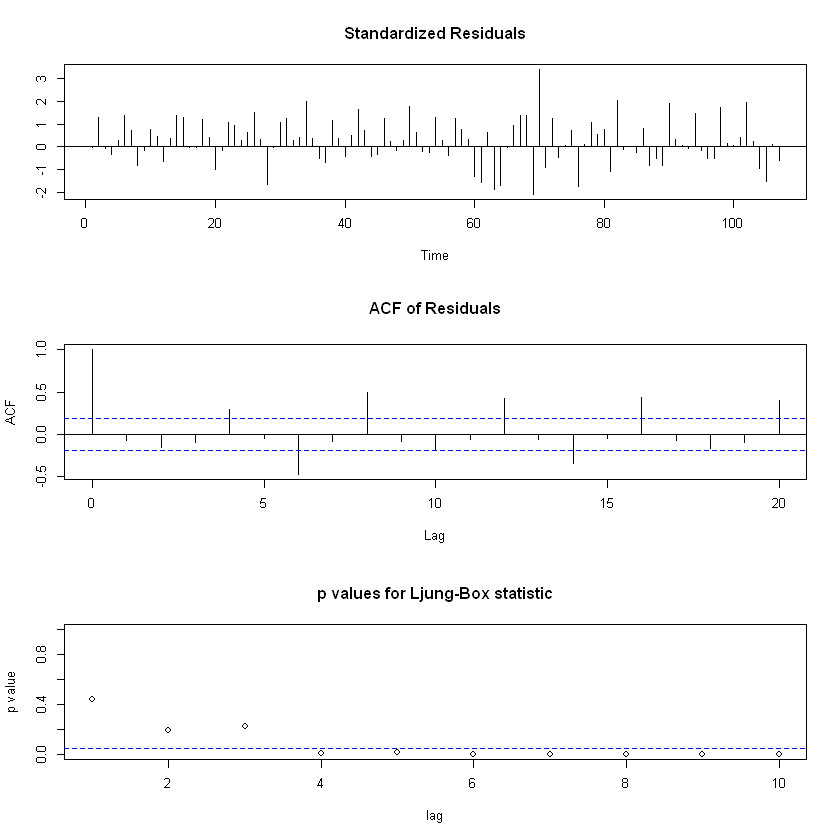

In [24]:
tsdiag(ftfinal.arima)

Model still has serial correlation. There looks to be a seasonal pattern in residuals. So a model that accounts for seasonality should perfom better. 

(ii)

In [38]:
mm<-arima(lg_earn,order=c(0,1,1),seasonal=list(order=c(0,0,1),period=4))

In [39]:
mm


Call:
arima(x = lg_earn, order = c(0, 1, 1), seasonal = list(order = c(0, 0, 1), period = 4))

Coefficients:
          ma1    sma1
      -0.6374  0.6493
s.e.   0.0593  0.0582

sigma^2 estimated as 0.02397:  log likelihood = 46.07,  aic = -86.15

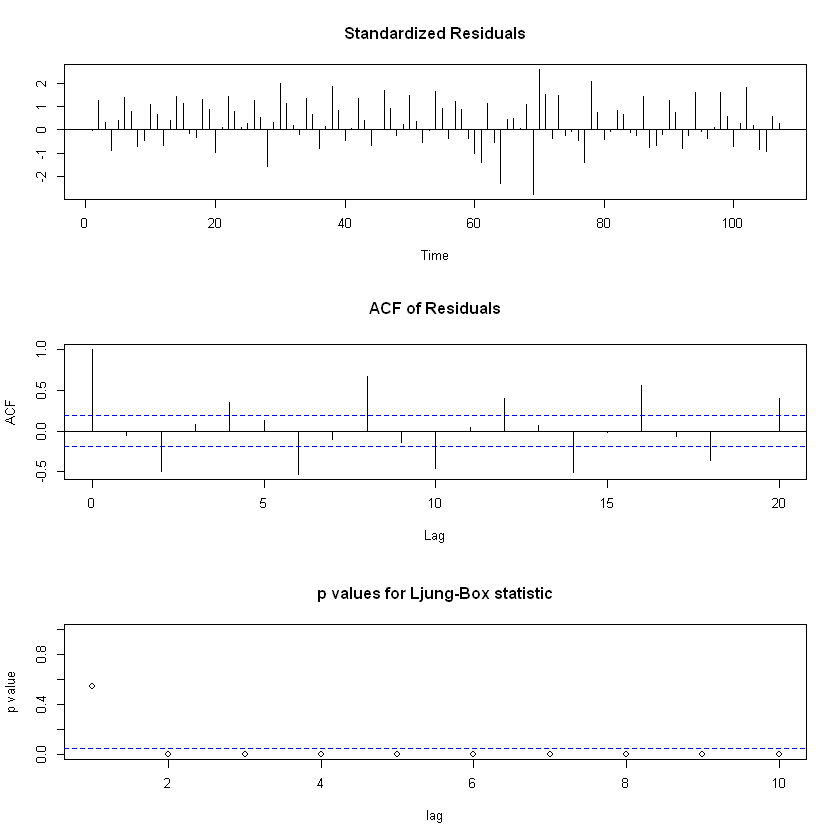

In [40]:
tsdiag(mm)

(iii)

Well the first model still perfoms better (lower AIC), most likely due to its AR and MA parts. But if the first model had a seasonal component like the second model it should do even better.

Using code again. But adding sesonal part to ARIMA candidates.

In [44]:
ftfinal.aic = Inf
ftfinal.order = c(0,0,0)
for (p in 1:5) for (d in 0:1) for (q in 1:5) {
    ftcurrent.aic = AIC(arima(lg_earn, order=c(p, d, q),seasonal=list(order=c(0,0,1),period=4)))
    if (ftcurrent.aic < ftfinal.aic) {
        ftfinal.aic = ftcurrent.aic
        ftfinal.order = c(p, d, q)
        ftfinal.arima = arima(lg_earn, order=ftfinal.order)
    }
}

Warning message in arima(lg_earn, order = ftfinal.order):
"possible convergence problem: optim gave code = 1"Warning message in arima(lg_earn, order = c(p, d, q), seasonal = list(order = c(0, :
"possible convergence problem: optim gave code = 1"Warning message in arima(lg_earn, order = c(p, d, q), seasonal = list(order = c(0, :
"possible convergence problem: optim gave code = 1"Warning message in arima(lg_earn, order = c(p, d, q), seasonal = list(order = c(0, :
"possible convergence problem: optim gave code = 1"Warning message in arima(lg_earn, order = c(p, d, q), seasonal = list(order = c(0, :
"possible convergence problem: optim gave code = 1"

ERROR: Error in arima(lg_earn, order = c(p, d, q), seasonal = list(order = c(0, : non-stationary AR part from CSS


In [45]:
ftfinal.order
ftfinal.arima

[1] 2 1 4


Call:
arima(x = lg_earn, order = ftfinal.order)

Coefficients:
          ar1      ar2      ma1     ma2      ma3     ma4
      -0.0048  -0.9800  -0.3903  0.9829  -0.4274  0.4235
s.e.   0.0195   0.0194   0.1158  0.0829   0.1053  0.1240

sigma^2 estimated as 0.00929:  log likelihood = 94.8,  aic = -175.6

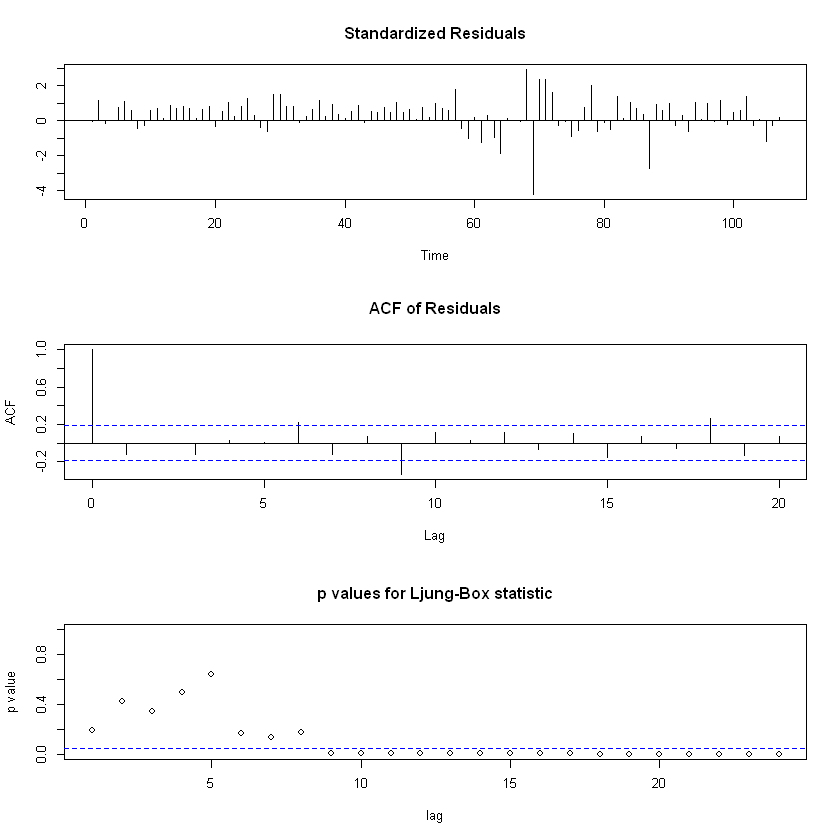

In [48]:
tsdiag(ftfinal.arima, gof = 24)

As suspected the first model performs much better with seasonal component added to it. The AIC went down to -175. Looks like there is some long term relationship that the model cannot explain.

(iv)

In [50]:
source("backtest.R")

In [51]:
mm1 = backtest(ftfinal.arima,lg_earn,75,1)
mm2 = backtest(mm,lg_earn,75,1)

[1] "RMSE of out-of-sample forecasts"
[1] 0.1033156
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.07891708
[1] "RMSE of out-of-sample forecasts"
[1] 0.1408561
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.1137484


The first model perform better out of sample. Its RMSE and MAE are both lower, this is due to its AR and MA components explaining more of the serial correlation.

Question 2

In [1]:
da2 = read.table("d-nflx3dxp913.txt", header = TRUE)

In [2]:
da2

PERMNO,date,nflx,vwretd,ewretd,sprtrn
89393,20090102,-0.000669,0.030501,0.038274,0.031608
89393,20090105,0.069300,-0.000580,0.016764,-0.004668
89393,20090106,0.031309,0.011297,0.033647,0.007817
89393,20090107,-0.006982,-0.030489,-0.022271,-0.030010
89393,20090108,0.013452,0.006283,0.011896,0.003397
89393,20090109,-0.026848,-0.022410,-0.018748,-0.021303
89393,20090112,-0.032548,-0.025560,-0.026589,-0.022564
89393,20090113,-0.008651,0.003514,0.003554,0.001758
89393,20090114,-0.045249,-0.035197,-0.035065,-0.033460
89393,20090115,0.070413,0.004632,0.005630,0.001329


In [3]:
lg_ret = log(da2$sprtrn + 1)

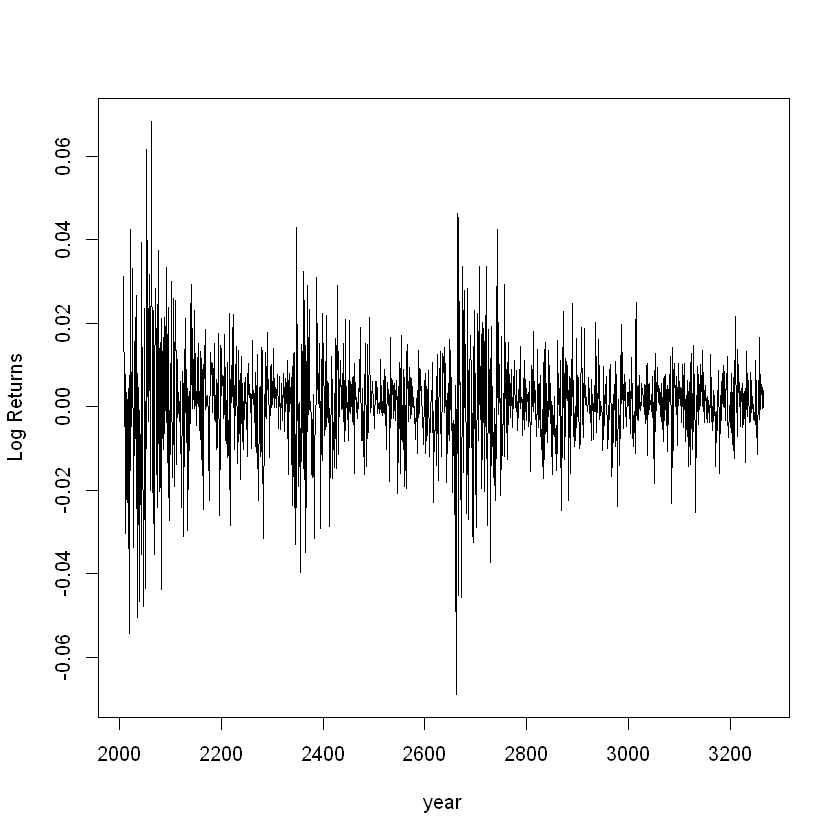

In [4]:
plot(ts(lg_ret,frequency=1,start=c(2009,1)),type='l',xlab='year',ylab='Log Returns')

Mean does look stationary around zero.

In [5]:
t.test(lg_ret)


	One Sample t-test

data:  lg_ret
t = 1.6451, df = 1257, p-value = 0.1002
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0001096113  0.0012480166
sample estimates:
   mean of x 
0.0005692027 


From t-test expected log returns is zero.

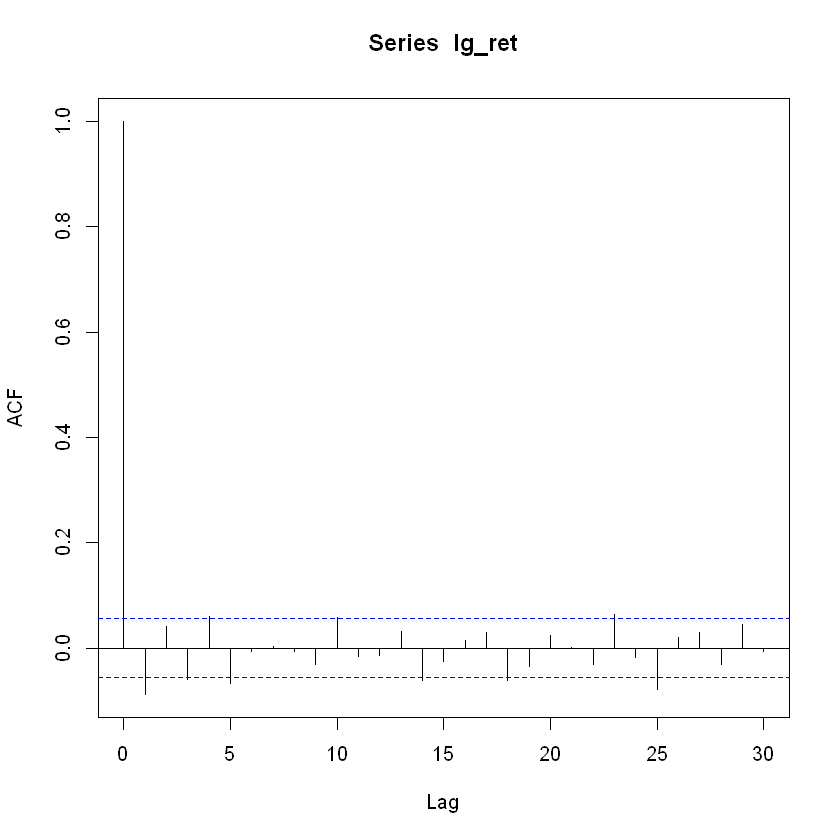

In [6]:
acf(lg_ret)

In [7]:
Box.test(lg_ret,lag=10,type='Ljung')


	Box-Ljung test

data:  lg_ret
X-squared = 32.427, df = 10, p-value = 0.0003399


From the Box-Ljung test we reject the null hypothesis of no serial correlation.

(ii)

In [8]:
ftfinal.aic = Inf
ftfinal.order = c(0,0,0)
for (p in 1:5) for (d in 0:1) for (q in 1:5) {
    ftcurrent.aic = AIC(arima(lg_ret, order=c(p, d, q),include.mean = F))
    if (ftcurrent.aic < ftfinal.aic) {
        ftfinal.aic = ftcurrent.aic
        ftfinal.order = c(p, d, q)
        ftfinal.arima = arima(lg_ret, order=ftfinal.order)
    }
}

Warning message in arima(lg_ret, order = c(p, d, q), include.mean = F):
"possible convergence problem: optim gave code = 1"Warning message in arima(lg_ret, order = c(p, d, q), include.mean = F):
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"

In [9]:
ftfinal.order
ftfinal.arima

[1] 2 0 5

Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"


Call:
arima(x = lg_ret, order = ftfinal.order)

Coefficients:
         ar1      ar2     ma1     ma2      ma3     ma4      ma5  intercept
      0.1689  -0.0539  -0.249  0.1011  -0.0696  0.0686  -0.0757      6e-04
s.e.     NaN      NaN     NaN     NaN   0.0244     NaN   0.0296      3e-04

sigma^2 estimated as 0.0001478:  log likelihood = 3762.56,  aic = -7507.13

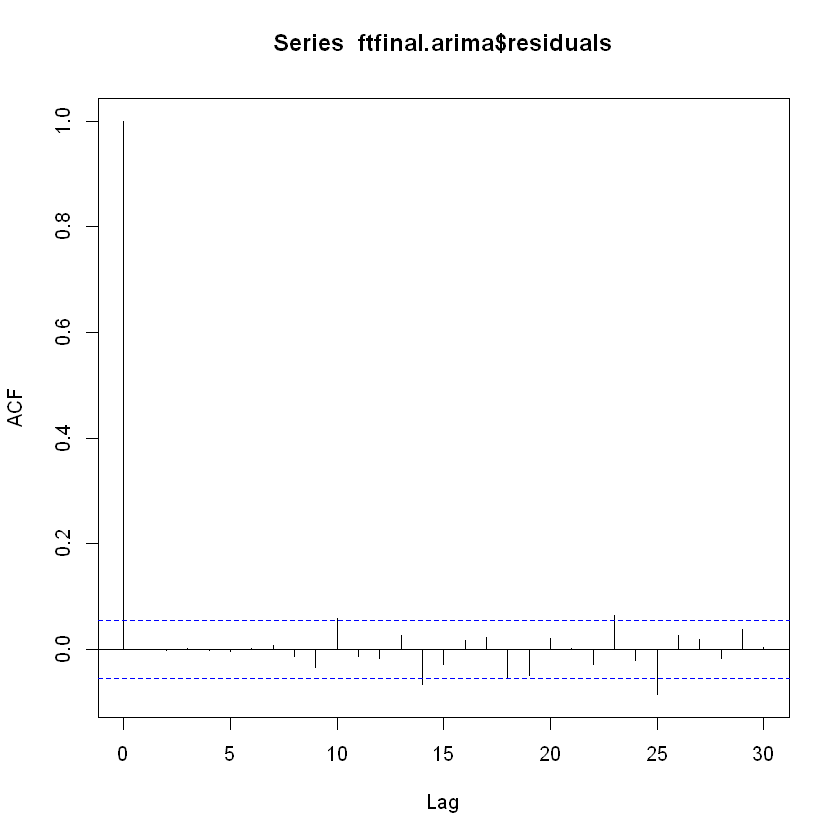

In [10]:
acf(ftfinal.arima$residuals)

In [11]:
Box.test(ftfinal.arima$residuals,lag=24,type='Ljung')


	Box-Ljung test

data:  ftfinal.arima$residuals
X-squared = 29.628, df = 24, p-value = 0.1974


Fail to reject null hypothesis of no serial correlation in residuals.

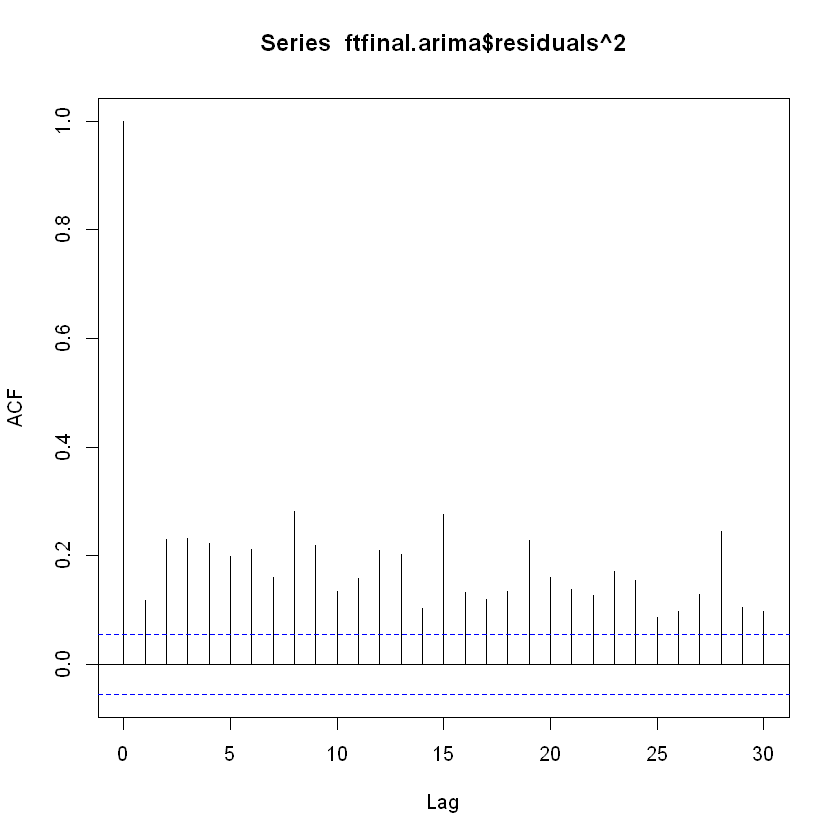

In [12]:
acf(ftfinal.arima$residuals^2)

In [13]:
Box.test(ftfinal.arima$residuals^2,lag=24,type='Ljung')


	Box-Ljung test

data:  ftfinal.arima$residuals^2
X-squared = 1069.4, df = 24, p-value < 2.2e-16


Squared residuals do have serial correlation. There is ARCH effect in this series

(iii)

In [14]:
library(fGarch)

Warning message:
"package 'fGarch' was built under R version 3.3.3"Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org


Code below selects ARMA Garch with best AIC

In [51]:
gafinal.aic = Inf
gafinal.order = c(0,0,0)
fit = garchFit(~garch(1,1), data = lg_ret, trace = F)

for (p in 0:5) for (q in 0:5) for(a in 1:2) for(b in 1:2) {
    gacurrent = garchFit(substitute(~arma(c,d)+garch(alp,beta), list(c= p,d = q,alp = a,beta = b)) , data = lg_ret, trace = FALSE)
    gacurrent.aic = gacurrent@fit$ics["AIC"]
    if (gacurrent.aic < gafinal.aic) {
        gafinal.aic = gacurrent.aic
        gafinal.order = c(p, q, a, b)
        fit = gacurrent
    }
}

Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"Warning message in arima(.series$x, order = c(u, 0, v), include.mean = include.mean):
"possible convergence problem: optim gave code = 1"Warning message in arima(.series$x, order

In [52]:
gafinal.order

[1] 4 3 2 1

In [53]:
summary(fit)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = substitute(~arma(c, d) + garch(alp, beta), 
    list(c = p, d = q, alp = a, beta = b)), data = lg_ret, trace = FALSE) 

Mean and Variance Equation:
 data ~ arma(4, 3) + garch(2, 1)
<environment: 0x0000000013644b98>
 [data = lg_ret]

Conditional Distribution:
 norm 

Coefficient(s):
         mu          ar1          ar2          ar3          ar4          ma1  
 1.6049e-04  -5.5036e-01   4.1620e-01   9.2440e-01   2.6085e-02   4.9966e-01  
        ma2          ma3        omega       alpha1       alpha2        beta1  
-4.7066e-01  -9.3490e-01   4.0128e-06   1.0000e-08   1.5476e-01   8.1493e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      1.605e-04   1.076e-04    1.492 0.135815    
ar1    -5.504e-01   3.270e-02  -16.830  < 2e-16 ***
ar2     4.162e-01   4.467e-02    9.317  < 2e-16 ***
ar3     9.244e-01   3.997e-02   23.126  < 2e-16 ***
ar4     2.608e-02   2.823e-02    0.924

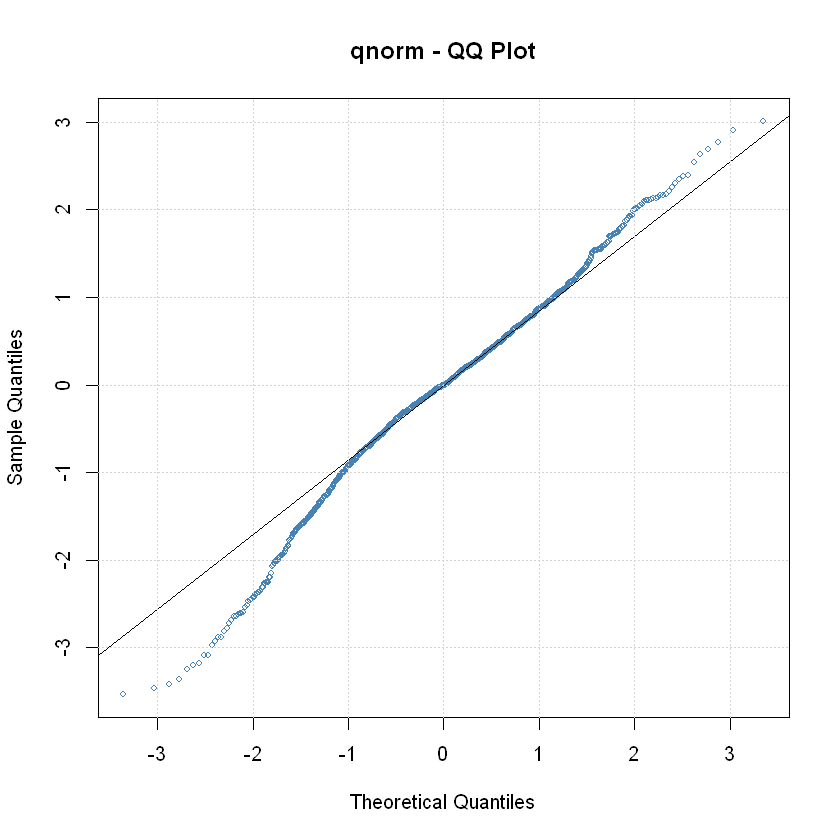

In [54]:
plot(fit,which=13)

Model passes all correlation tests. From QQ plot Normality assumption is violated.

(iv)

In [56]:
ga.T = garchFit(~arma(4,3)+garch(2,1), data = lg_ret, trace = FALSE,cond.dist = "std")
summary(ga.T)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(4, 3) + garch(2, 1), data = lg_ret, 
    cond.dist = "std", trace = FALSE) 

Mean and Variance Equation:
 data ~ arma(4, 3) + garch(2, 1)
<environment: 0x000000001204eaa0>
 [data = lg_ret]

Conditional Distribution:
 std 

Coefficient(s):
         mu          ar1          ar2          ar3          ar4          ma1  
 2.4498e-04  -5.5654e-01   4.0405e-01   9.0217e-01   1.3150e-02   5.1394e-01  
        ma2          ma3        omega       alpha1       alpha2        beta1  
-4.4948e-01  -9.1836e-01   4.0682e-06   1.0000e-08   1.6380e-01   8.1319e-01  
      shape  
 5.8516e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      2.450e-04   1.764e-04    1.389  0.16488    
ar1    -5.565e-01   4.298e-02  -12.949  < 2e-16 ***
ar2     4.041e-01   6.289e-02    6.425 1.32e-10 ***
ar3     9.022e-01   5.286e-02   17.068  < 2e-16 ***
ar4     1.315e-02   2.753e-02    0.478  0.63295 

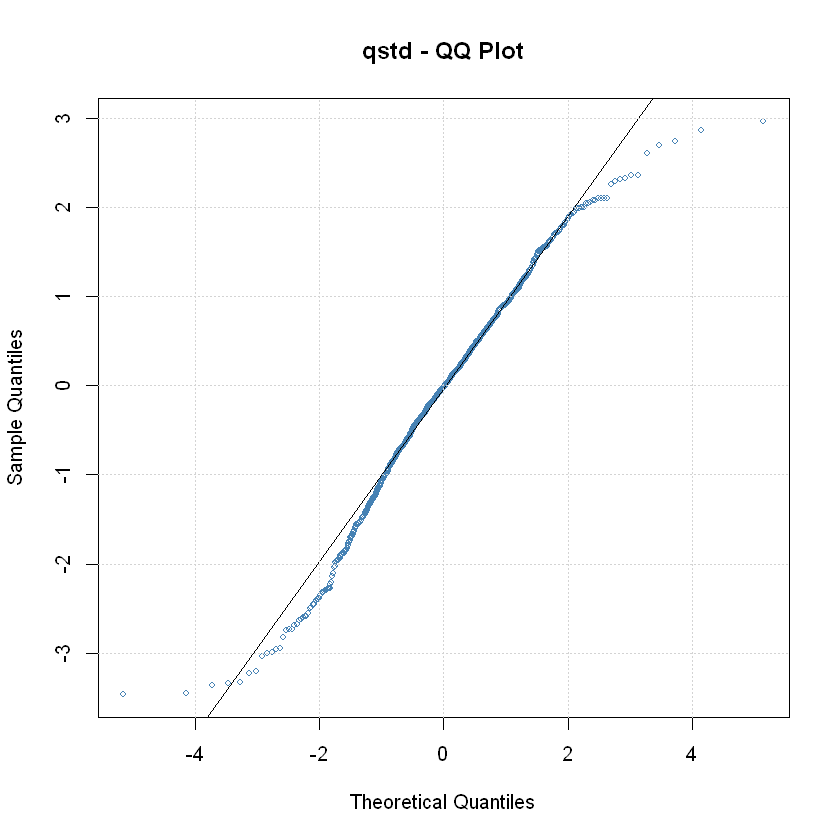

In [57]:
plot(ga.T,which=13)

The model does well with the serial corellation tests. The t distribution assumption seems more correct then normal but t assumption still is violated.

(v)

In [65]:
predict(ga.T,1)

meanForecast,meanError,standardDeviation
0.0006967763,0.006354918,0.006354918


In [66]:
predict(ga.T,2)

meanForecast,meanError,standardDeviation
0.0006967763,0.006354918,0.006354918
0.0008638267,0.006209721,0.006203817


Question 3

(i)

In [1]:
source("RMeasure.R")
source("RMfit.R")
library("fGarch")
library(readxl)

In [8]:
da3 = read_excel("AMZN.xlsx")

In [9]:
da3

Date,Open,High,Low,Close,Adj Close,Volume
2002-01-03,11.13,11.94,11.05,11.90,11.90,10875700
2002-01-04,12.02,12.40,11.95,12.25,12.25,12687300
2002-01-07,12.08,12.51,12.08,12.34,12.34,12182900
2002-01-08,12.27,12.32,11.75,11.85,11.85,6041100
2002-01-09,11.96,12.17,11.30,11.53,11.53,10879600
2002-01-10,11.66,11.67,10.87,11.04,11.04,8125900
2002-01-11,11.03,11.34,10.93,11.03,11.03,4276800
2002-01-14,10.80,10.83,10.09,10.11,10.11,5973300
2002-01-15,10.34,10.42,10.16,10.29,10.29,5092300
2002-01-16,10.01,10.01,9.03,9.13,9.13,15039900


In [34]:
da3["lgac"] <-(log(da3['Adj Close']))

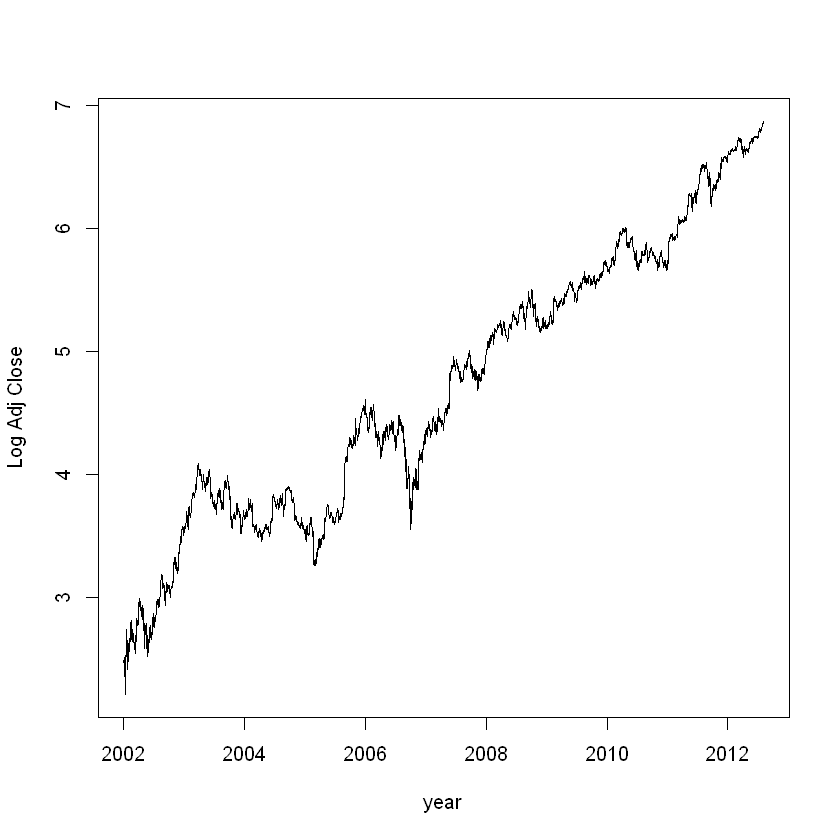

In [52]:
plot(ts(da3["lgac"],frequency=365,start=c(2002,1)),type='l',xlab='year',ylab='Log Adj Close')

In [54]:
vec = diff(da3[["lgac"]])

In [55]:
RMfit(vec)

[1] -8417.276
  0:    -8417.2764: 0.900000
  3:    -8607.4360: 0.971020
  6:    -8686.2318: 0.990468

Coefficient(s):
        Estimate  Std. Error  t value   Pr(>|t|)    
alpha 0.99048590  0.00089819  1102.76 < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Volatility prediction:
     Orig      Vpred
[1,] 3868 0.01250008

 Risk measure based on RiskMetrics:
      prob        VaR         ES
[1,] 0.950 0.02056081 0.02578408
[2,] 0.990 0.02907954 0.03331540
[3,] 0.999 0.03862816 0.04208891


The fitted Igarch alpha is .9904859

In [56]:
1000000*0.02907954
1000000*0.03331540

[1] 29079.54

[1] 33315.4

The VAR is $29079.54

The ES is $33315.4

In [58]:
sqrt(10)*0.02907954*1000000

[1] 91957.58

The 10 day VAR is $91957

(ii)

Fitting GARCH(1,1) with Normal Innovations

In [65]:
m4=garchFit(~garch(1,1),data=vec,include.mean=F,trace=F)

In [66]:
summary(m4)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = vec, include.mean = F, 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x000000000753a068>
 [data = vec]

Conditional Distribution:
 norm 

Coefficient(s):
     omega      alpha1       beta1  
4.1227e-05  8.1621e-02  8.6791e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega  4.123e-05   7.178e-06    5.744 9.26e-09 ***
alpha1 8.162e-02   1.380e-02    5.917 3.29e-09 ***
beta1  8.679e-01   1.915e-02   45.312  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 8671.47    normalized:  2.241848 

Description:
 Tue May 23 15:26:20 2017 by user: chris 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  44506.34  0        
 Shapiro-Wilk Test  R    W      0.8801718 0        
 Ljung-Box Test     R    Q(10)  6.838319  0.740

All tests show model is adequate

One day ahead forecast

In [68]:
predict(m4,1)

meanForecast,meanError,standardDeviation
0,0.01901282,0.01901282


In [69]:
RMeasure(0,.01901282)


 Risk Measures for selected probabilities: 
       prob        VaR         ES
[1,] 0.9500 0.03127331 0.03921799
[2,] 0.9900 0.04423043 0.05067324
[3,] 0.9990 0.05875403 0.06401788
[4,] 0.9999 0.07070899 0.07526186


In [70]:
0.04423043*1000000
0.05067324*1000000

[1] 44230.43

[1] 50673.24

VAR is $44230.43

ES is $50673.24

(iii)

In [71]:
m5 = garchFit(~garch(1,1),data=vec,include.mean=F,trace=F,cond.dist = "std")

In [72]:
summary(m5)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = vec, cond.dist = "std", 
    include.mean = F, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x0000000008469460>
 [data = vec]

Conditional Distribution:
 std 

Coefficient(s):
     omega      alpha1       beta1       shape  
1.5264e-06  2.1294e-02  9.7604e-01  3.6161e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega  1.526e-06   7.032e-07    2.171     0.03 *  
alpha1 2.129e-02   3.344e-03    6.368 1.91e-10 ***
beta1  9.760e-01   3.446e-03  283.211  < 2e-16 ***
shape  3.616e+00   2.046e-01   17.675  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 9270.755    normalized:  2.396782 

Description:
 Tue May 23 15:34:22 2017 by user: chris 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  60366.36  0        
 Shap

Model is adequate bases on tests

One day forecast

In [73]:
predict(m5,1)

meanForecast,meanError,standardDeviation
0,0.01228168,0.01228168


In [74]:
RMeasure(0,0.01228168)


 Risk Measures for selected probabilities: 
       prob        VaR         ES
[1,] 0.9500 0.02020157 0.02533358
[2,] 0.9900 0.02857146 0.03273331
[3,] 0.9990 0.03795324 0.04135352
[4,] 0.9999 0.04567577 0.04861678


In [75]:
.02857146*1000000
0.03273331*1000000

[1] 28571.46

[1] 32733.31

VAR is $28571.46

ES is $32733.31

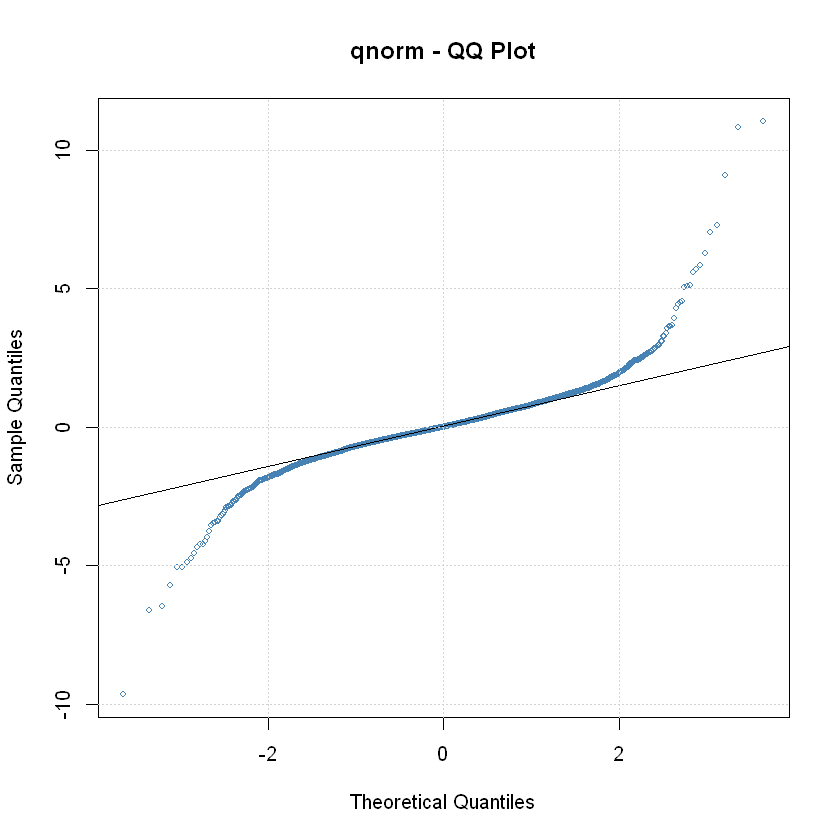

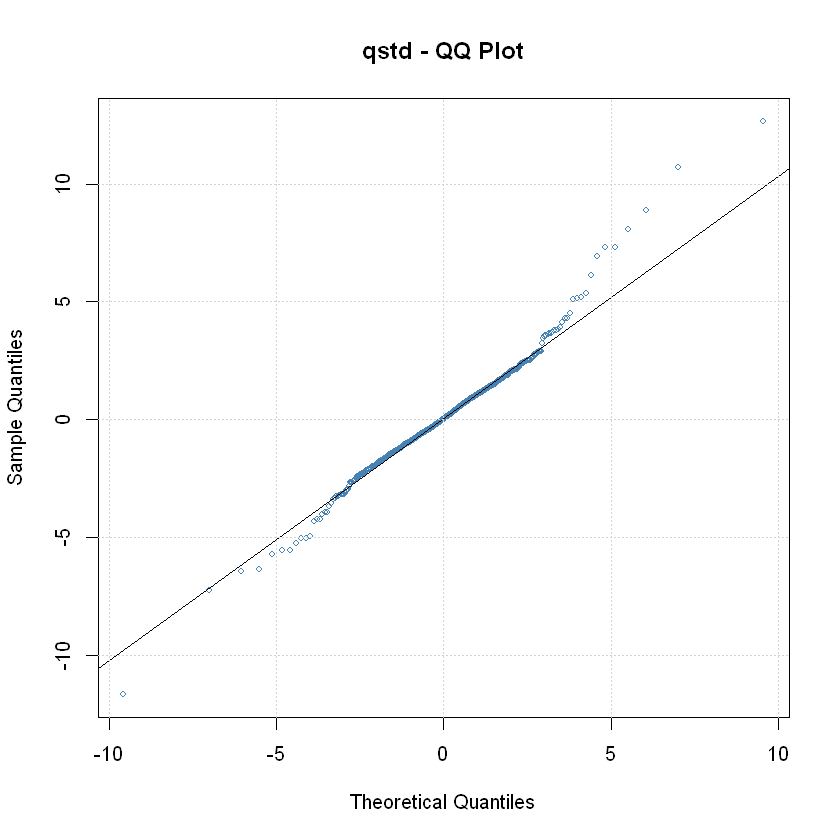

In [76]:
plot(m4,which=13)# Gaussian
plot(m5,which=13)# student T

GARCH(1,1) with T innovations looks more appropriate.